In [2]:
import pandas as pd

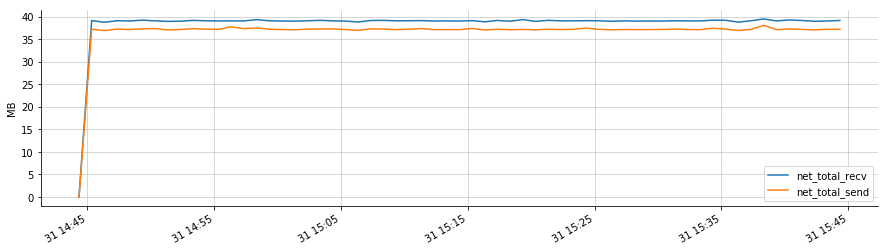

In [11]:
dstatfile = 'dstat.csv'

def dstat_header(_csvfile):
    def _fix_line(s):
        return s.strip().replace('"','').replace(' ','_').replace('/','_')
    with open(_csvfile) as f:
        last_a = None
        for a, b in zip(*map(lambda x: x.split(","), map(_fix_line, f.readlines()[5:7]))):
            if not a: a = last_a
            yield a + "_" + b
            last_a = a
            
df_dstat = pd.read_csv(dstatfile, skiprows=7, names=list(dstat_header(dstatfile)))
df_dstat['datetime'] = pd.to_datetime("2019-" + df_dstat.system_time, format="%Y-%d-%m %H:%M:%S")
df_dstat.set_index('datetime', inplace=True)
ax = (df_dstat[['net_total_recv', 'net_total_send']]/1024/1024).plot(figsize=(15,4))
ax.set_ylabel('MB')
ax.set_xlabel('')
ax.axes.grid(linewidth=0.5) 
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')